---
# 1. **Introduction**
---

__Company Introduction:__

SWIPECAR, is an American company that buys and sells second hand cars.
They initiated their business in the late 80s and have gained huge popularity over the years.
The company clients are local and foreign customers who seek to buy and sell second hand cars.




__Current Scenario:__

Company has started facing loss in business due to the technical advancements.
There are several competitors in the market who have been using enhanced techniques.
The company is pretty old and they have been using traditional measures to estimate old cars prices.
These traditional measures include weight analysis, condition of parts and build year.
They are looking for a more robust way to estimate the price of old cars.

---
# 2. **Problem Statement**
---

__The current process suffers from the following problems:__

They have been using manual traditional measures to estimate old cars prices.
These measures are time consuming and not accurate.
Company is looking for a robust way to estimate the prices of used cars.

Recently they got to know about data scientists who help businesses to sort out such issues.They decided to hire a team of data scientists. Consider you are one of them.

Your role as **Data Scientist** is to: 
 - predict the prices of used cars based on their features.
 - find an automated way to get rid of their manual work.
 - build a regression model using the provided data.

---
# 3. Importing Libraries
---

In [2]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import pandas_profiling                                             # For simple Exploratory data analysis
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression                   # To import Linear Regression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [3]:
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression                   # To create the Linear Regression Model
from sklearn import metrics                                        

---
# 4. Data Acquisition & Description
---

In [4]:
#Read the dataset
df_car = pd.read_csv('TrainData.csv', index_col=0) 
print('Data Shape:', df_car.shape)
df_car.head()

Data Shape: (181, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.40000,175.60000,66.50000,53.90000,2458,ohc,four,122,mpfi,3.31,3.54,8.70000,92,4200,27,32,11248
2,0,188,bmw,gas,std,two,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2710,ohc,six,164,mpfi,3.31,3.19,9.00000,121,4250,21,28,20970
3,0,?,renault,gas,std,four,wagon,fwd,front,96.10000,181.50000,66.50000,55.20000,2579,ohc,four,132,mpfi,3.46,3.9,8.70000,?,?,23,31,9295
4,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.90000,186.70000,68.40000,56.70000,3197,l,four,152,idi,3.7,3.52,21.00000,95,4150,28,33,13200
5,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2935,ohc,four,141,mpfi,3.78,3.15,9.50000,114,5400,24,28,15985


In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 181
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          181 non-null    int64  
 1   normalized-losses  181 non-null    object 
 2   make               181 non-null    object 
 3   fuel-type          181 non-null    object 
 4   aspiration         181 non-null    object 
 5   num-of-doors       181 non-null    object 
 6   body-style         181 non-null    object 
 7   drive-wheels       181 non-null    object 
 8   engine-location    181 non-null    object 
 9   wheel-base         181 non-null    float64
 10  length             181 non-null    float64
 11  width              181 non-null    float64
 12  height             181 non-null    float64
 13  curb-weight        181 non-null    int64  
 14  engine-type        181 non-null    object 
 15  num-of-cylinders   181 non-null    object 
 16  engine-size        181 non

**Observation:**
- The train dataset contains __181 rows/observations__ and __26 columns/attributes.__ (ID column is marked as index)
- The last column __price__ is the __target variable__.
- There are __11 numerical variables present before pre-processing.__
- Data types of the following attributes are __incorrectly identified as object__ which needs to be examined and corrected __to numeric:__
    - normalized-losses
    - bore
    - stroke
    - horsepower
    - peak-rpm
- There should be 10 categorical variables.
    

In [6]:
df_car.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,181.00000,181,181,181,181,181,181,181,181,181.00000,181.00000,181.00000,181.00000,181.00000,181,181,181.00000,181,181,181,181.00000,181,181,181.00000,181.00000,181.00000
unique,nan,52,22,2,2,3,5,3,2,nan,nan,nan,nan,nan,6,7,nan,8,37,35,nan,58,23,nan,nan,nan
top,nan,?,toyota,gas,std,four,sedan,fwd,front,nan,nan,nan,nan,nan,ohc,four,nan,mpfi,3.62,3.4,nan,68,4800,nan,nan,nan
freq,nan,34,28,163,147,102,83,108,178,nan,nan,nan,nan,nan,128,140,nan,81,21,17,nan,16,34,nan,nan,nan
mean,0.85083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.72928,174.17403,65.94365,53.70994,2564.16575,NaN,NaN,127.90055,NaN,NaN,NaN,10.15425,NaN,NaN,25.13260,30.64641,13271.31492
std,1.26704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.11620,12.33657,2.14611,2.49773,523.48902,NaN,NaN,42.57844,NaN,NaN,NaN,3.98231,NaN,NaN,6.41821,6.88855,8106.47963
min,-2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.60000,141.10000,60.30000,47.80000,1488.00000,NaN,NaN,61.00000,NaN,NaN,NaN,7.00000,NaN,NaN,13.00000,16.00000,5118.00000
25%,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.50000,166.80000,64.20000,51.60000,2190.00000,NaN,NaN,98.00000,NaN,NaN,NaN,8.60000,NaN,NaN,19.00000,25.00000,7775.00000
50%,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.90000,173.20000,65.50000,54.10000,2420.00000,NaN,NaN,120.00000,NaN,NaN,NaN,9.00000,NaN,NaN,24.00000,30.00000,10295.00000
75%,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.40000,183.10000,66.60000,55.50000,2935.00000,NaN,NaN,146.00000,NaN,NaN,NaN,9.40000,NaN,NaN,30.00000,34.00000,16500.00000


**Observations:**
- Target variable __price is positively skewed__ as the mean value 13271.314 is to the right of the median 10295.
- length, width and height of the car is almost normally distributed.
- Wheel-base, curb-weight, engine-size are slightly positively skewed. So there are outliers present here.
- In normalised-losses fudged value ? is present which needs imputation.
- There are __22 varieties of car make__ and __Toyota__ is maximum in number (28 in total).
- There are __2 varieties of fuel-type__ and __gas__ is maximum in number.
- There are __2 varieties of aspiration__ and __std__ is maximum in number.
- There are __3 varieties of num-of-doors__. There seems to be some incorrect data here which needs to be examined and corrected. The top variety is __four door.__(102 in total)
- There are __5 varieties of body-style__ and __sedan__ is maximum in number(83 in total).
- There are __3 varieties of drive-wheels__ There seems to be some incorrect data here which needs to be examined and corrected. The top variety is __fwd.__(108 in total)
- There are __2 varieties of engine-location__ and __front__ is maximum in number(178 in total).
- There are __6 varieties of engine-type__ and __ohc__ is maximum in number(128 in total).
- There are __7 varieties of num-of-cylinders__ and __four__ is maximum in number(140 in total).
- There are __8 varieties of fuel-system__ and __mpfi__ is maximum in number(81 in total).
- There are __no missing values__ but incorrect/fudged values that needs correction.

---
# 5 . Data Pre-Processing
---

### 5.1 Data Pre-Profiling

In [7]:
!pip install pandas==0.25         #install pandas version 0.25 for pandas profiling or it might give some error while profiling

ERROR: Invalid requirement: '#install'


In [8]:
profile = pandas_profiling.ProfileReport(df_car)
profile.to_file(output_file = 'Used car_Price Prediction_Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


### 5.2  Identification & Handling of Missing Data
- In this section we will **analyze** and **identify** **missing information** such as **null data, zero data, incorrect data**.

#### Data Cleaning of Numeric columns

__1. normalized-losses:__

In [9]:
#checking for the incorrect values in normalized-losses
display(df_car['normalized-losses'].unique())

array(['65', '188', '?', '161', '103', '118', '145', '89', '153', '91',
       '107', '95', '102', '104', '93', '85', '137', '150', '148', '74',
       '142', '110', '125', '231', '197', '168', '87', '106', '108',
       '134', '115', '164', '128', '154', '121', '158', '94', '83', '81',
       '122', '77', '129', '192', '113', '90', '186', '194', '78', '119',
       '101', '256', '98'], dtype=object)

In [10]:
(df_car['normalized-losses'] == '?').value_counts()

False    147
True      34
Name: normalized-losses, dtype: int64

In [11]:
#Finding the median value of normalized-losses
df_car[~(df_car['normalized-losses'] == '?')]['normalized-losses'].median()

115.0

In [12]:
#Replacing the '?' value with the median value of normalized-losses
df_car['normalized-losses'] = df_car['normalized-losses'].str.replace('?', '115').astype(int)

In [13]:
# rechecking normalized-losses with '?' value
(df_car['normalized-losses'] == '?').value_counts()

False    181
Name: normalized-losses, dtype: int64

__2. bore:__

In [14]:
# checking the values in the bore column
display(df_car['bore'].unique())

array(['3.31', '3.46', '3.7', '3.78', '3.03', '3.63', '3.74', '3.62',
       '3.17', '3.27', '3.19', '3.15', '3.58', '2.91', '3.54', '?',
       '2.97', '3.35', '3.43', '3.24', '3.6', '3.05', '3.59', '3.39',
       '2.99', '3.33', '3.13', '3.8', '3.01', '3.5', '3.34', '3.47',
       '3.61', '2.68', '3.94', '2.92', '3.08'], dtype=object)

In [15]:
(df_car['bore']== '?').value_counts()

False    177
True       4
Name: bore, dtype: int64

In [16]:
#getting the median value for bore column
df_car[~(df_car['bore'] == '?')]['bore'].median()

3.33

In [17]:
#replacing the '?' value with the median
df_car['bore'] = df_car['bore'].str.replace('?', '3.33').astype(float)

In [18]:
# rechecking the values in the column
(df_car['bore']== '?').value_counts()

False    181
Name: bore, dtype: int64

__3. stroke:__

In [19]:
# checking the values in the stroke column
display(df_car['stroke'].unique())

array(['3.54', '3.19', '3.9', '3.52', '3.15', '3.39', '4.17', '2.9',
       '2.64', '3.46', '3.35', '3.4', '3.58', '3.64', '3.41', '3.07', '?',
       '3.23', '3.1', '3.27', '3.08', '3.12', '3.03', '3.86', '3.5',
       '3.29', '3.47', '2.36', '3.11', '2.19', '2.76', '2.8', '2.68',
       '3.21', '2.87'], dtype=object)

In [20]:
(df_car['stroke']== '?').value_counts()

False    177
True       4
Name: stroke, dtype: int64

In [21]:
#getting the median value for stroke column
df_car[~(df_car['stroke'] == '?')]['stroke'].median()

3.35

In [22]:
#replacing the '?' value with the median
df_car['stroke'] = df_car['stroke'].str.replace('?', '3.35').astype(float)

In [23]:
# rechecking the values in the column
(df_car['stroke']== '?').value_counts()

False    181
Name: stroke, dtype: int64

__4. horsepower:__

In [24]:
# checking the unique values in the horsepower column
display(df_car['horsepower'].unique())

array(['92', '121', '?', '95', '114', '102', '176', '207', '94', '116',
       '56', '88', '100', '111', '68', '123', '82', '58', '160', '135',
       '110', '162', '86', '155', '76', '161', '112', '175', '145', '62',
       '152', '70', '69', '182', '84', '115', '101', '55', '73', '97',
       '48', '140', '90', '184', '106', '72', '52', '262', '85', '142',
       '154', '134', '156', '143', '78', '60', '200', '64'], dtype=object)

In [25]:
(df_car['horsepower']== '?').value_counts()

False    179
True       2
Name: horsepower, dtype: int64

In [26]:
#getting the median value for horsepower column
df_car[~(df_car['horsepower'] == '?')]['horsepower'].median()

95.0

In [27]:
#replacing the '?' value with the median
df_car['horsepower'] = df_car['horsepower'].str.replace('?', '95').astype(int)

In [28]:
# rechecking the values in the column
(df_car['horsepower']== '?').value_counts()

False    181
Name: horsepower, dtype: int64

__5. peak-rpm:__

In [29]:
# checking the unique values in the peak-rpm column
display(df_car['peak-rpm'].unique())

array(['4200', '4250', '?', '4150', '5400', '5500', '4750', '5900',
       '5200', '4500', '4800', '5000', '4350', '6000', '5250', '5100',
       '5800', '6600', '4400', '4900', '5300', '5600', '4650'],
      dtype=object)

In [30]:
#getting the median value for peak-rpm column
df_car[~(df_car['peak-rpm'] == '?')]['peak-rpm'].median()

5100.0

In [31]:
#replacing the '?' value with the median
df_car['peak-rpm'] = df_car['peak-rpm'].str.replace('?', '5100').astype(int)

In [32]:
# rechecking the values in the column
(df_car['peak-rpm']== '?').value_counts()

False    181
Name: peak-rpm, dtype: int64

### Data Cleaning for Categorical columns

__1. car make:__

In [33]:
#checking the unique values for car 'make'
display(df_car['make'].unique())

array(['toyota', 'bmw', 'renault', 'peugot', 'volvo', 'dodge', 'jaguar',
       'porsche', 'subaru', 'mitsubishi', 'volkswagen', 'honda', 'mazda',
       'mercedes-benz', 'saab', 'nissan', 'mercury', 'plymouth', 'audi',
       'chevrolet', 'isuzu', 'alfa-romero'], dtype=object)

_There is no correction required for the car make._

__2. fuel-type:__

In [34]:
#checking the unique values for fuel-type
display(df_car['fuel-type'].unique())

array(['gas', 'diesel'], dtype=object)

_There is no correction required for the fuel-type._

__3. aspiration:__

In [35]:
#checking the unique values for fuel-type
display(df_car['aspiration'].unique())

array(['std', 'turbo'], dtype=object)

_There is no correction required for the aspiration._

__4. num-of-doors:__

In [36]:
# checking the unique values for num-of-doors
display(df_car['num-of-doors'].unique())

array(['four', 'two', '?'], dtype=object)

_num-of-doors contains value '?' which needs to be corrected_

In [37]:
(df_car['num-of-doors'] == '?').value_counts()

False    179
True       2
Name: num-of-doors, dtype: int64

In [38]:
#getting the mode for num-of-doors
df_car[~(df_car['num-of-doors'] == '?')]['num-of-doors'].mode()

0    four
dtype: object

In [39]:
#replacing the '?' value with the mode of num-of-doors
df_car['num-of-doors'] = df_car['num-of-doors'].str.replace('?', 'four')

In [40]:
#rechecking for '?' values
(df_car['num-of-doors'] == '?').value_counts()

False    181
Name: num-of-doors, dtype: int64

__5. body-style:__

In [41]:
display(df_car['body-style'].unique())

array(['hatchback', 'sedan', 'wagon', 'hardtop', 'convertible'],
      dtype=object)

_There is no correction required for the body-style._

__6. drive-wheels:__

In [42]:
#checkiing unique values for the column
display(df_car['drive-wheels'].unique())

array(['fwd', 'rwd', '4wd'], dtype=object)

In [43]:
#Replacing '4wd' with 'fwd'
df_car['drive-wheels'] = df_car['drive-wheels'].str.replace('4wd', 'fwd')

In [44]:
#rechecking the values
(df_car['drive-wheels'] == '4wd').value_counts()

False    181
Name: drive-wheels, dtype: int64

__7. engine-location:__

In [45]:
display(df_car['engine-location'].unique())

array(['front', 'rear'], dtype=object)

_There is no correction required for the engine-location._

__8. engine-type:__

In [46]:
display(df_car['engine-type'].unique())

array(['ohc', 'l', 'dohc', 'ohcf', 'rotor', 'ohcv'], dtype=object)

_There is no correction required for the engine-type._

__9. num-of-cylinders:__

In [47]:
display(df_car['num-of-cylinders'].unique())

array(['four', 'six', 'five', 'two', 'eight', 'three', 'twelve'],
      dtype=object)

_There is no correction required for the num-of-cylinders._

__10. fuel-system:__

In [48]:
display(df_car['fuel-system'].unique())

array(['mpfi', 'idi', 'spdi', '2bbl', '1bbl', 'mfi', '4bbl', 'spfi'],
      dtype=object)

_There is no correction required for the fuel-system._

In [49]:
df_car['symboling'] = df_car['symboling'].astype(dtype=object)

In [50]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 181
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          181 non-null    object 
 1   normalized-losses  181 non-null    int32  
 2   make               181 non-null    object 
 3   fuel-type          181 non-null    object 
 4   aspiration         181 non-null    object 
 5   num-of-doors       181 non-null    object 
 6   body-style         181 non-null    object 
 7   drive-wheels       181 non-null    object 
 8   engine-location    181 non-null    object 
 9   wheel-base         181 non-null    float64
 10  length             181 non-null    float64
 11  width              181 non-null    float64
 12  height             181 non-null    float64
 13  curb-weight        181 non-null    int64  
 14  engine-type        181 non-null    object 
 15  num-of-cylinders   181 non-null    object 
 16  engine-size        181 non

In [51]:
df_car.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,181.00000,181.00000,181,181,181,181,181,181,181,181.00000,181.00000,181.00000,181.00000,181.00000,181,181,181.00000,181,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000
unique,6.00000,nan,22,2,2,2,5,2,2,nan,nan,nan,nan,nan,6,7,nan,8,nan,nan,nan,nan,nan,nan,nan,nan
top,0.00000,nan,toyota,gas,std,four,sedan,fwd,front,nan,nan,nan,nan,nan,ohc,four,nan,mpfi,nan,nan,nan,nan,nan,nan,nan,nan
freq,59.00000,nan,28,163,147,104,83,116,178,nan,nan,nan,nan,nan,128,140,nan,81,nan,nan,nan,nan,nan,nan,nan,nan
mean,nan,119.76243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.72928,174.17403,65.94365,53.70994,2564.16575,NaN,NaN,127.90055,NaN,3.33878,3.27613,10.15425,104.06630,5106.62983,25.13260,30.64641,13271.31492
std,nan,31.68287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.11620,12.33657,2.14611,2.49773,523.48902,NaN,NaN,42.57844,NaN,0.26229,0.30659,3.98231,37.76809,470.62042,6.41821,6.88855,8106.47963
min,nan,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.60000,141.10000,60.30000,47.80000,1488.00000,NaN,NaN,61.00000,NaN,2.68000,2.19000,7.00000,48.00000,4150.00000,13.00000,16.00000,5118.00000
25%,nan,98.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.50000,166.80000,64.20000,51.60000,2190.00000,NaN,NaN,98.00000,NaN,3.15000,3.12000,8.60000,72.00000,4800.00000,19.00000,25.00000,7775.00000
50%,nan,115.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.90000,173.20000,65.50000,54.10000,2420.00000,NaN,NaN,120.00000,NaN,3.33000,3.35000,9.00000,95.00000,5100.00000,24.00000,30.00000,10295.00000
75%,nan,134.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.40000,183.10000,66.60000,55.50000,2935.00000,NaN,NaN,146.00000,NaN,3.59000,3.46000,9.40000,116.00000,5500.00000,30.00000,34.00000,16500.00000


### 5.4 Data Post-Profiling

In [52]:
profile = pandas_profiling.ProfileReport(df_car)
profile.to_file(output_file = 'Used car_Price Prediction_Post Profiling Report.html')
print('Accomplished!')


Accomplished!



# 6. Exploratory Data Analysis


### Analysis of Categorical columns

In [53]:
col_category = ['symboling','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type',
           'num-of-cylinders','fuel-system', 'make']

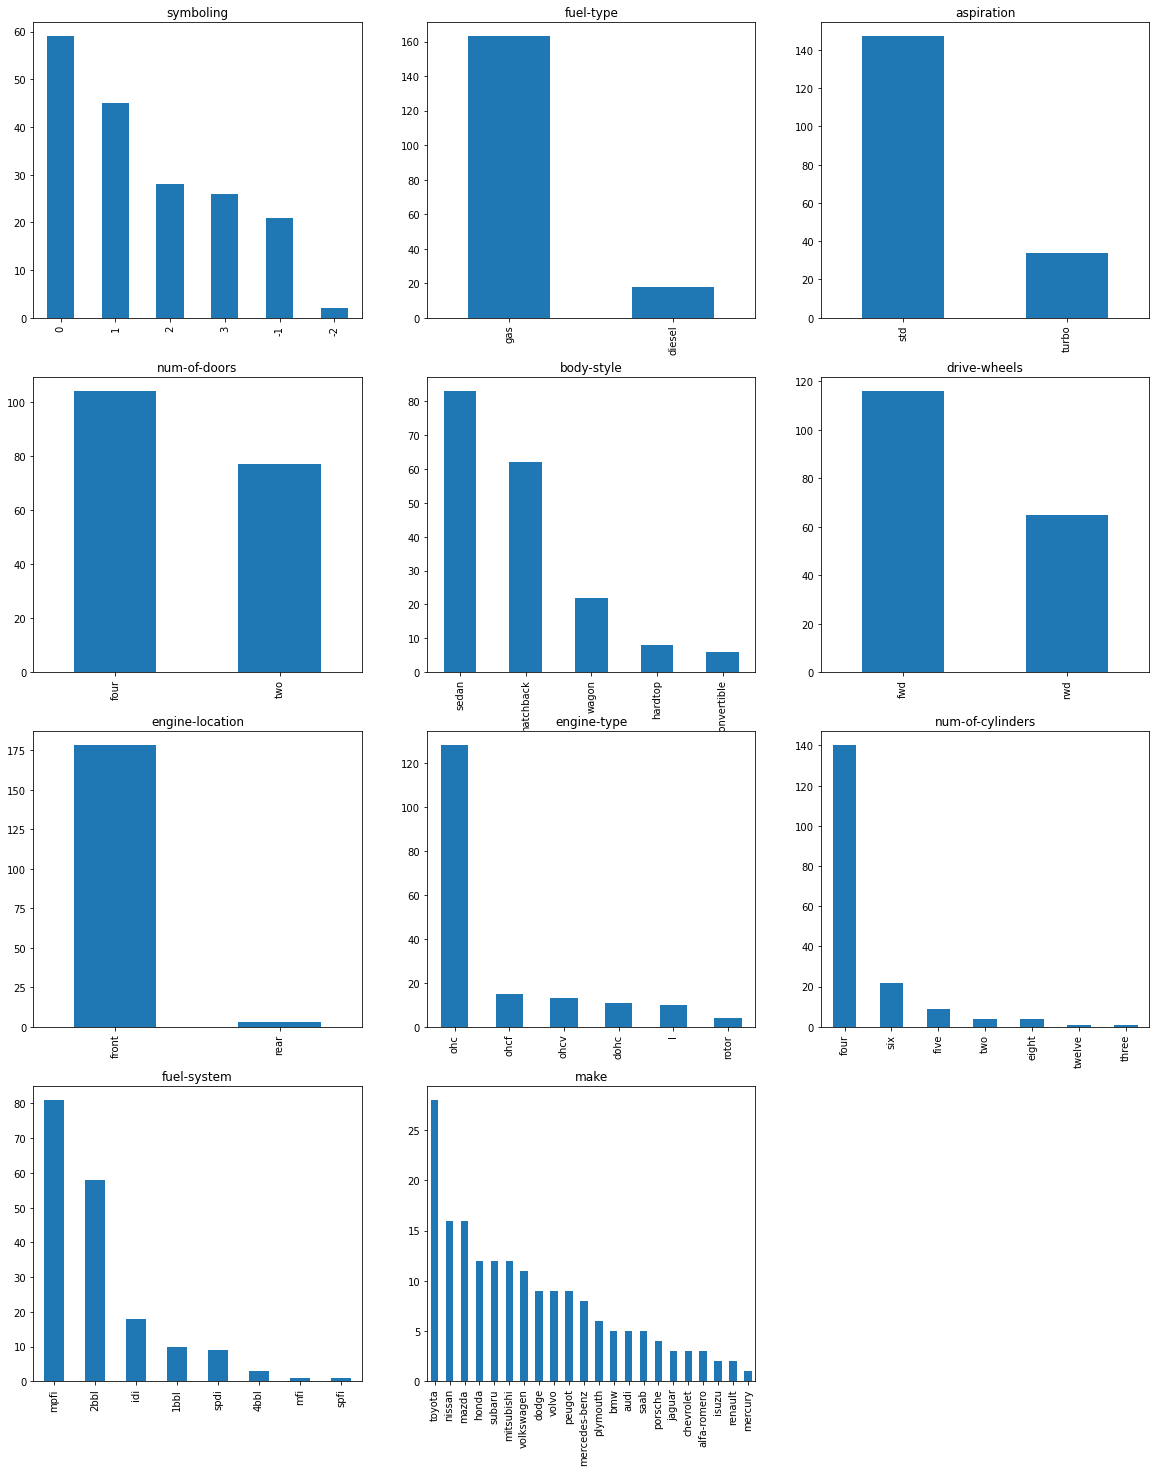

In [54]:
# plotting Bar chart to check for the categorical columns
k=0
plt.figure(figsize=(20,25))
for col in col_category:    
    k=k+1
    plt.subplot(4, 3, k)    
    df_car[col].value_counts().plot(kind='bar');
    plt.title(col)

__Observations:__
 1. symboling - There are very few cars with rating -2.
 2. fule-type - There are very few cars with fule type as Gas.
 3. aspiration - Lesser number of turbo than std.
 4. engine-loaction - Considerably large number of front engine cars.
 5. engine-type - Considerably more number of ohc than others.
 6. num-of-cylinder  - Large number of four cyliners than others.
 7. fule-system - mpfi and 2bbl fulesystem cars are more comparitavely others.
 8. make - Most of the Toyata company cars were surveyed.

### How many cars have four doors?

In [55]:
#How many cars have four doors?
df_car['num-of-doors'].value_counts()

four    104
two      77
Name: num-of-doors, dtype: int64

### What is the proportion of different drive-wheels cars?

<AxesSubplot:ylabel='drive-wheels'>

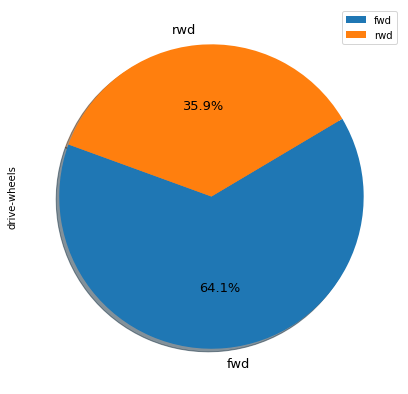

In [56]:
df_car['drive-wheels'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=160, legend=True,figsize=(15,7), fontsize=13)

### What is the proportion of Symboling feature ?

<AxesSubplot:ylabel='symboling'>

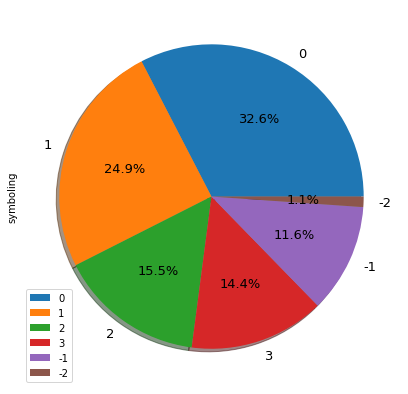

In [57]:
df_car['symboling'].value_counts().plot.pie(autopct='%3.1f%%', shadow=True, startangle=0, legend=True,figsize=(15,7), fontsize=13)

### Visualising the target 'price' varibale

Text(0.5, 1.0, 'Histogram showing the distribution of Price of used cars')

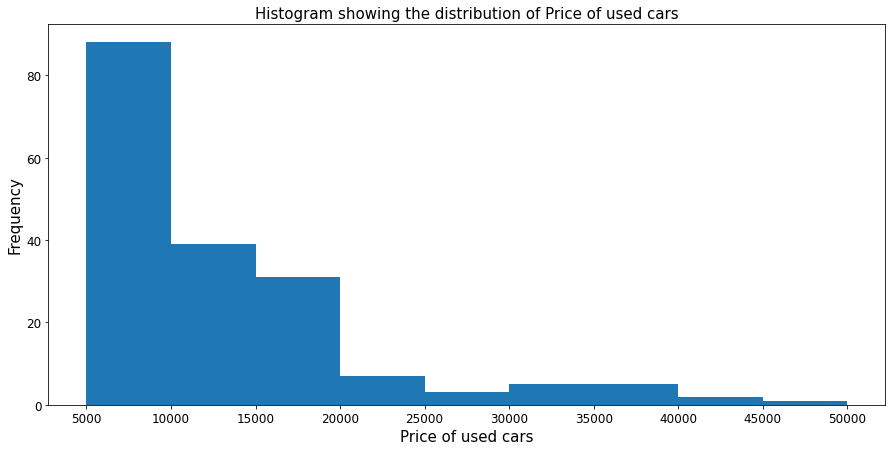

In [58]:
# plotting a histogram to visualize the distribution of the 'price' variable

bins= [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
df_car['price'].plot.hist(bins=bins, figsize=(15,7), fontsize=12,  xticks=bins)
plt.xlabel('Price of used cars', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram showing the distribution of Price of used cars', fontsize=15)

__Price of the cars is highly positively skewed with maximum number of cars in the range of 5000 - 10000.__


Text(0.5, 1.0, 'Histogram showing the distribution of log of Price of used cars')

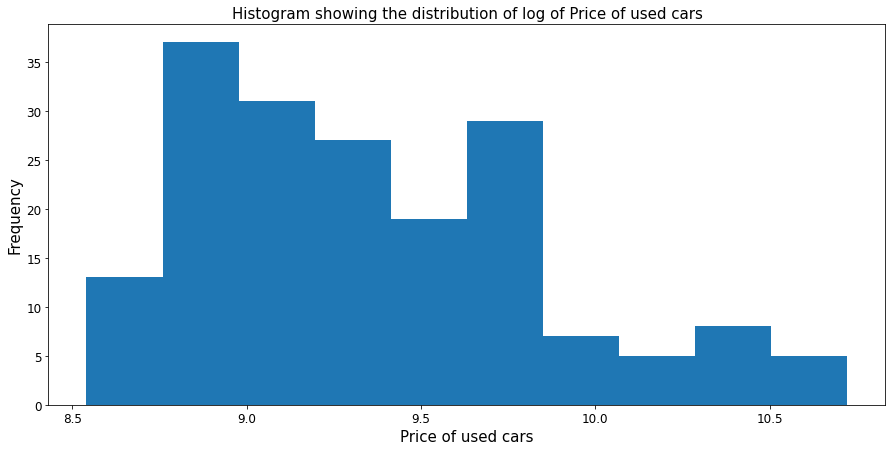

In [59]:
np.log(df_car['price']).plot.hist(figsize=(15,7), fontsize=12)
plt.xlabel('Price of used cars', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram showing the distribution of log of Price of used cars', fontsize=15)

__Price of the cars is now comparatively normally distributed considering the log value of the price.__


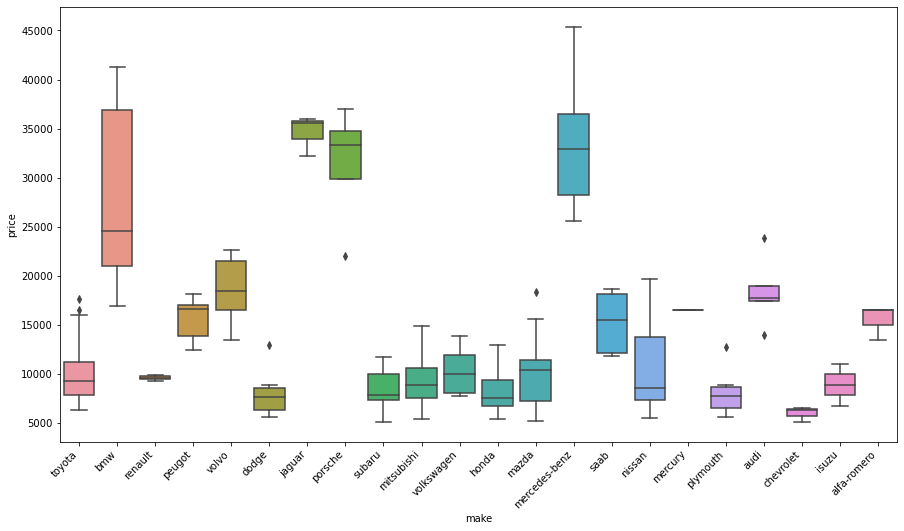

In [60]:
#plotting boxplot for all car 'make' against 'price' of the car

plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'make', y = 'price', data = df_car)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

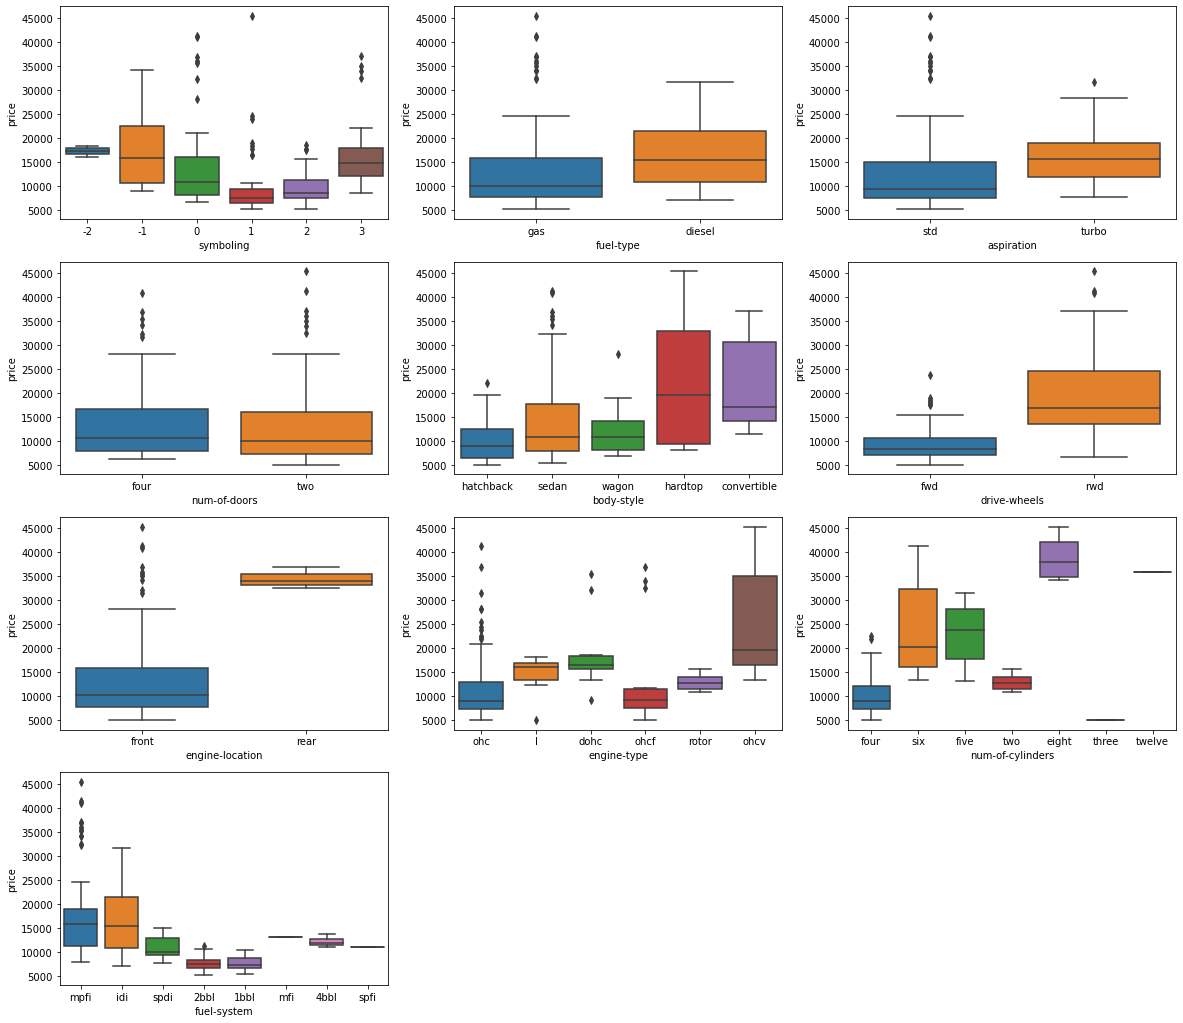

In [61]:
# Boxplot for all categorical variables against price
k=0
plt.figure(figsize=(20,18))
for col in range (len(col_category)-1):    
    k=k+1
    plt.subplot(4, 3, k)   
    ax = sns.boxplot(x = col_category[col], y = 'price', data = df_car)

### Analysis of Numerical columns

In [62]:
col_numeric = ['normalized-losses','wheel-base','length','width','height','curb-weight', 'engine-size','bore','stroke',
               'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

<Figure size 1080x1080 with 0 Axes>

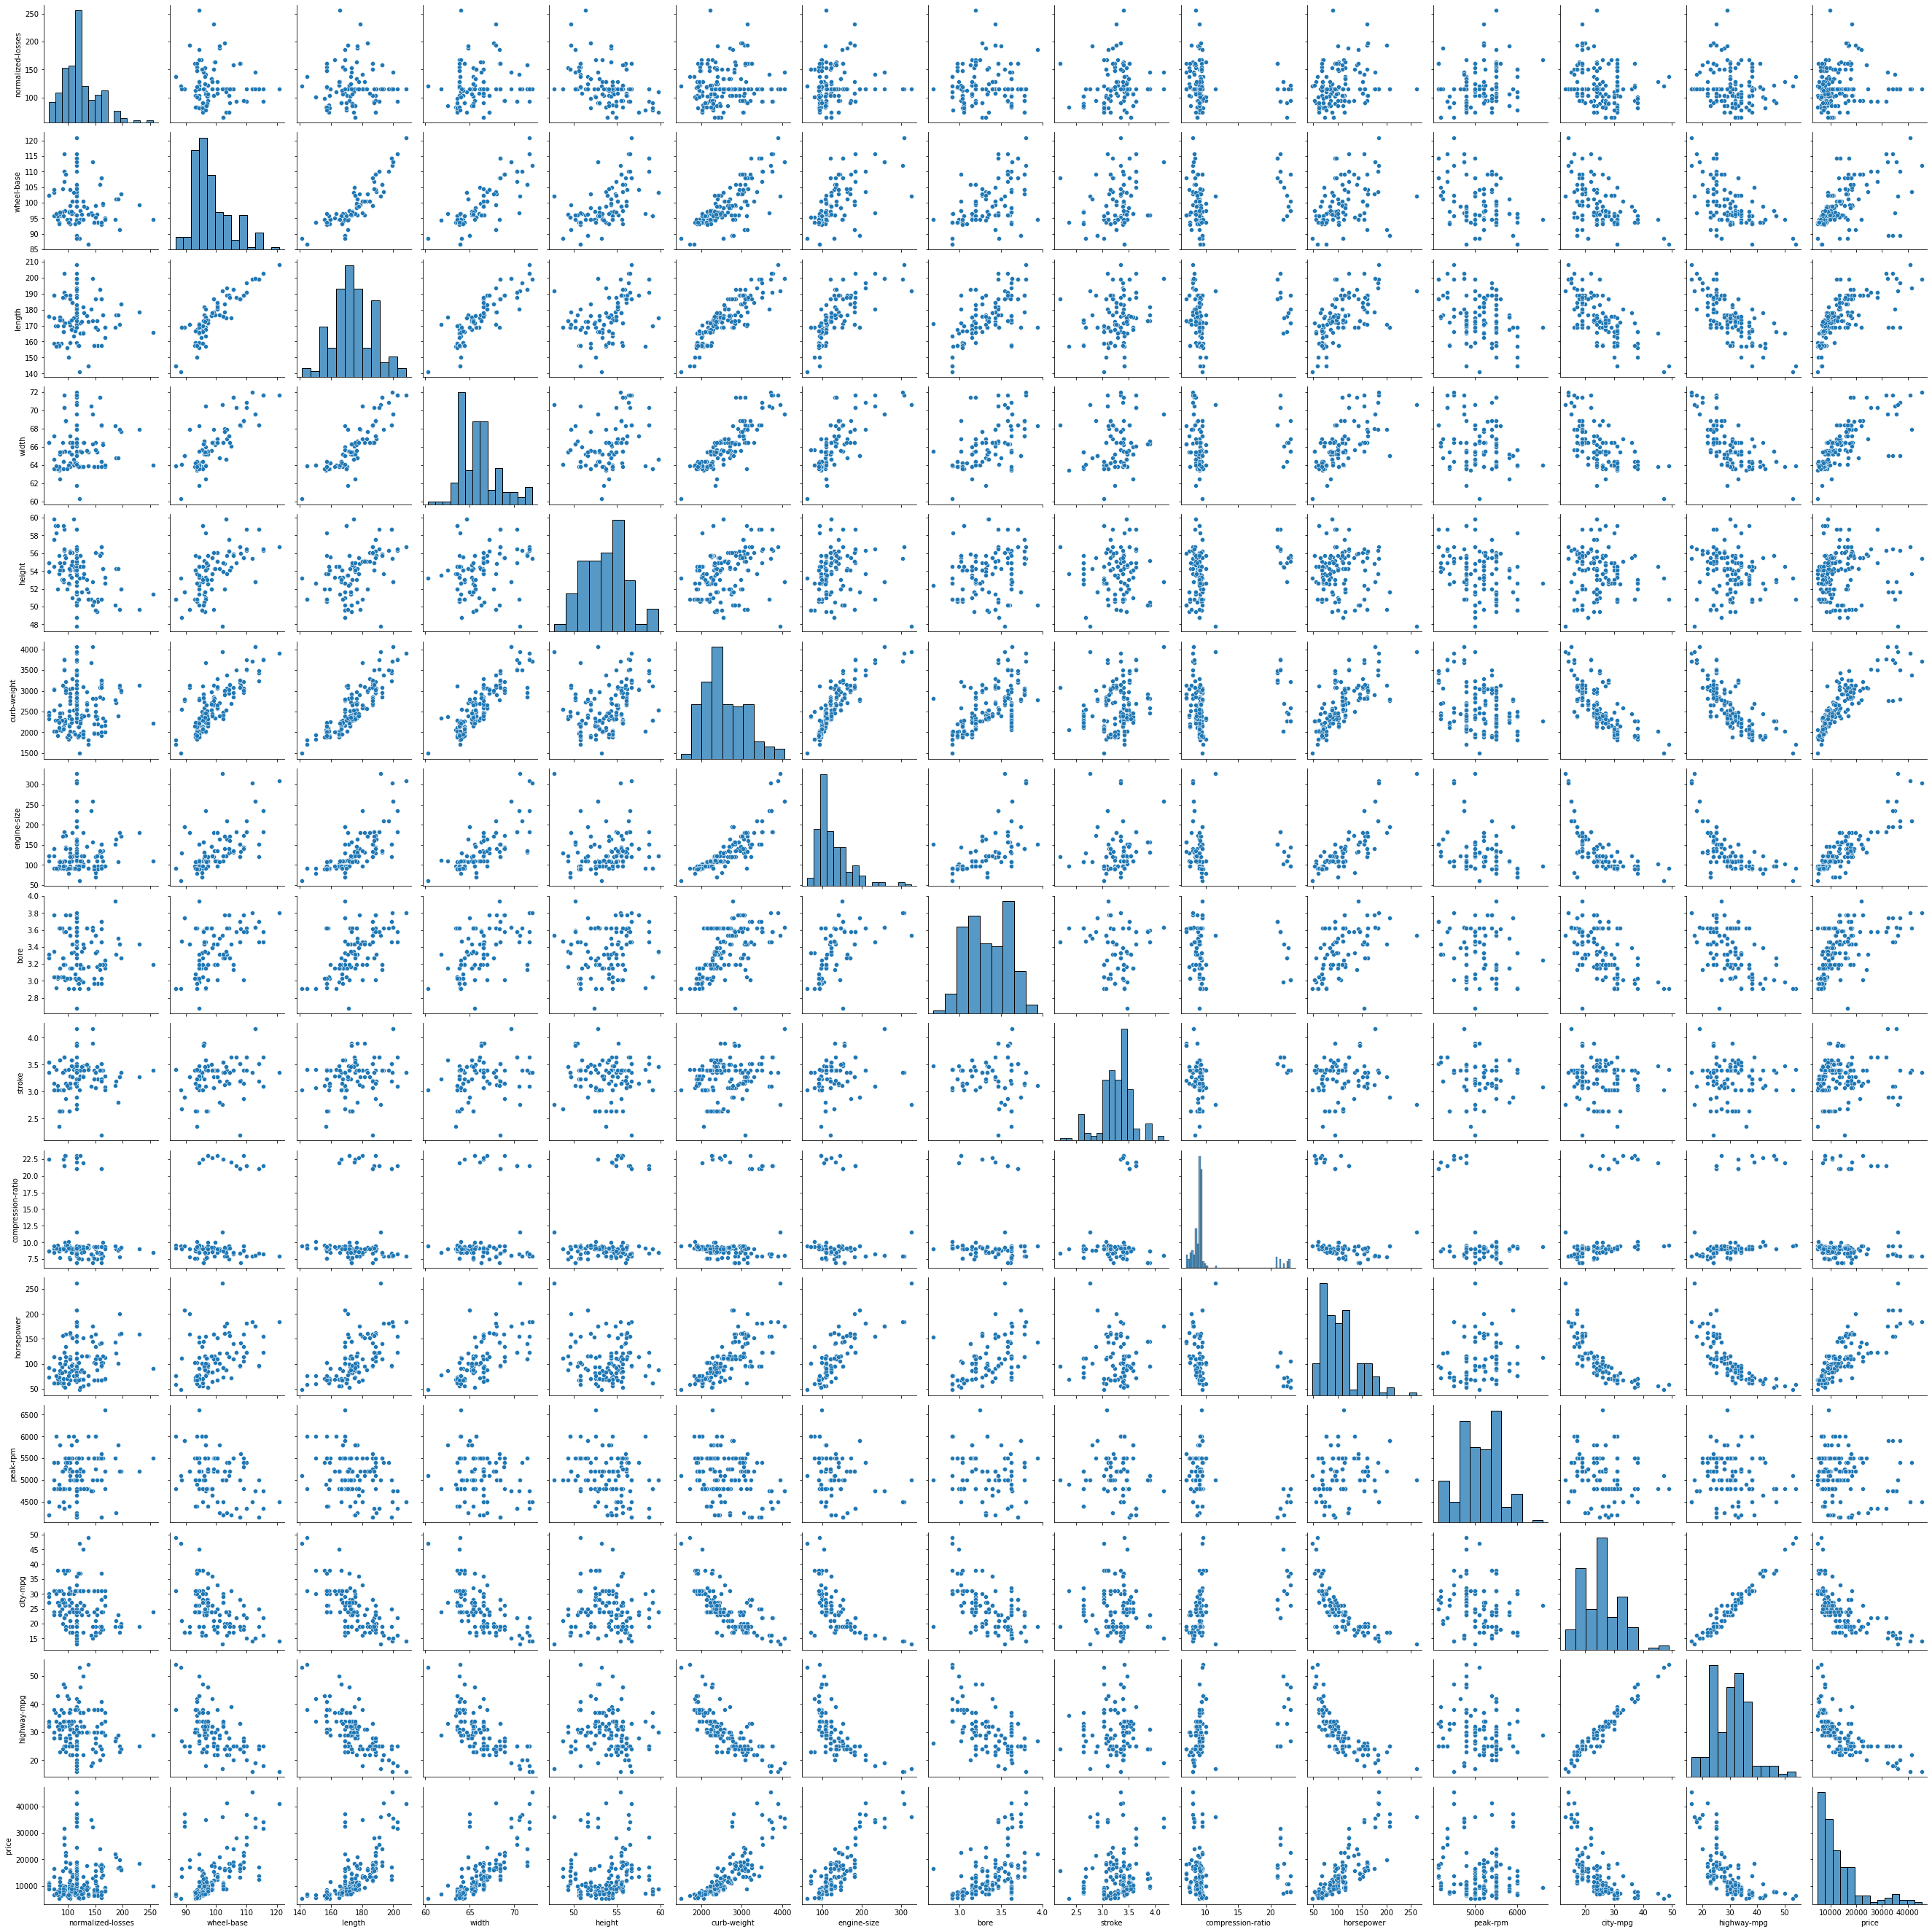

In [63]:
#visualizing pairwise correlation
plt.figure(figsize=(15,15))
sns.pairplot(df_car[col_numeric])

<AxesSubplot:>

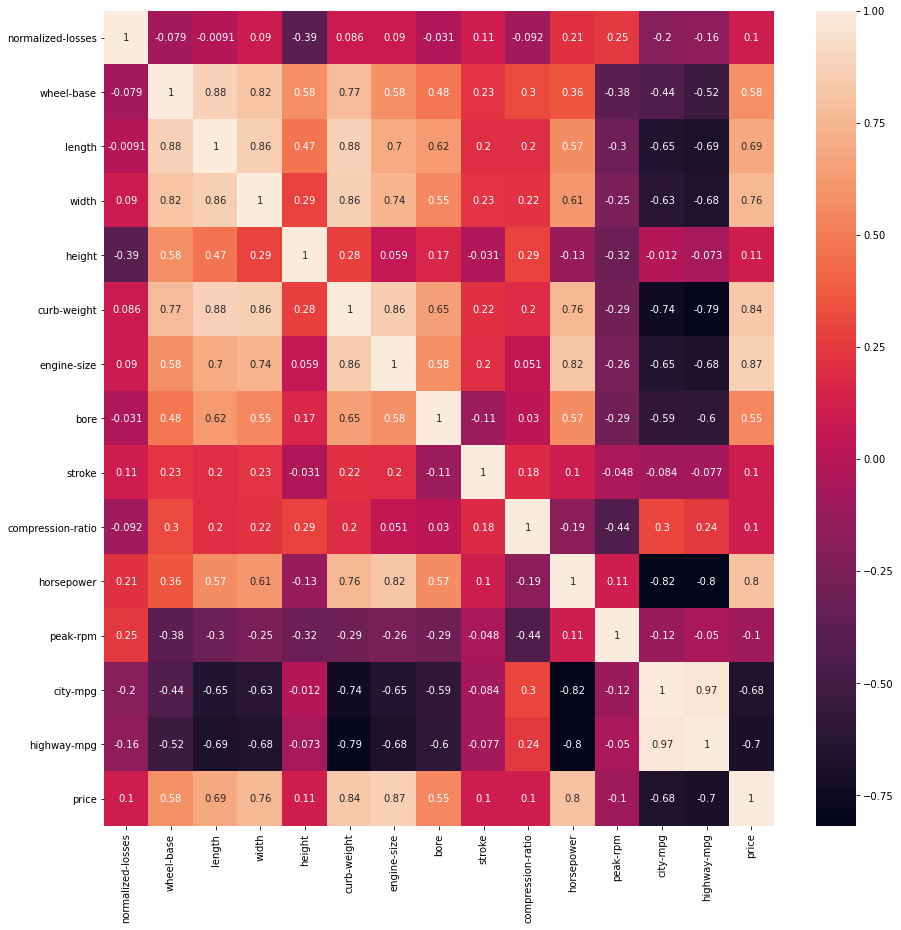

In [64]:
#plotting Heatmap correlation
plt.figure(figsize=(15,15))
sns.heatmap(df_car[col_numeric].corr(), annot=True )

__Observations:__ 
   - curb-weight, engine-size and horsepower are highly positively correlated (r > 0.8 value) with target variable 'price'.
   - wheel-base, length, width and bore are slightly positively correlated (0.5< r <0.8) with target variable 'price'.
   - city-mpg and highway-mpg are negatively correlated (~0.7) with the target variable 'price'.
   - city-mpg and highway-mpg have high mutlicollinearity (>0.9).
   - horsepower, city-mpg and highway-mpg have high mutlicollinearity (>-0.8).We will __consider horsepower__ as it has high collinearity with the price compared to other two.
   - horsepower and engine-size have high mutlicollinearity (>0.8).
   - curb-weight and engine-size have high mutlicollinearity (>0.8). We will __consider curb-weight__ as engine-size has multicollinearity with horsepower.
   - curb-weight and length and width have high mutlicollinearity (>0.8). We will __consider curb-weight__
   - length and width have high mutlicollinearity (>0.8) .We will __consider width__ as it has high collinearity with the price.
   - wheel-base and length and width have high mutlicollinearity (>0.8). We will __keep wheel-base__ as length and width are multicolinear with curbweight.
   - fuel-type and fuel-system are highly correlated. We will consider __fuel-system__.
   - Bore and Num-of-cyclinders are higly correlated. We will consider __bore__.
   - normalized-losses, height, stroke, compression-ratio, peak-rpm are weakly correlated with the target variable 'price'.
   

# 7. Data Preparation

   ### 7.1. Feature selection_Model 1_Baseline model based on the above observations

In [65]:
# we will remove unwanted and higly multicollinear features and select features as per assumptions of Linear Regression.
feature_cols_m1 = ['wheel-base', 'curb-weight', 'horsepower', 'bore', 'make', 'aspiration', 'body-style', 'fuel-system','engine-type', 'price']
df_car[feature_cols_m1].head()

,wheel-base,curb-weight,horsepower,bore,make,aspiration,body-style,fuel-system,engine-type,price
ID,,,,,,,,,,
1,102.40000,2458,92,3.31000,toyota,std,hatchback,mpfi,ohc,11248
2,101.20000,2710,121,3.31000,bmw,std,sedan,mpfi,ohc,20970
3,96.10000,2579,95,3.46000,renault,std,wagon,mpfi,ohc,9295
4,107.90000,3197,95,3.70000,peugot,turbo,sedan,idi,l,13200
5,104.30000,2935,114,3.78000,volvo,std,sedan,mpfi,ohc,15985


### 7.2. Encoding of Categorical Variables

In [66]:
# Encoding the categorical variables using One Hot Encoding
car_data1 = pd.get_dummies(df_car[feature_cols_m1], drop_first=True) 
car_data1.head()

,wheel-base,curb-weight,horsepower,bore,price,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,102.40000,2458,92,3.31000,11248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,101.20000,2710,121,3.31000,20970,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,96.10000,2579,95,3.46000,9295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,107.90000,3197,95,3.70000,13200,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5,104.30000,2935,114,3.78000,15985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


### 7.3. Cross-validation (Train- Test split)

In [67]:
# defining the X and Y variables
X1 = car_data1.drop('price',axis = 1)
y1 = car_data1['price']

In [68]:
X1.head()

,wheel-base,curb-weight,horsepower,bore,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,102.40000,2458,92,3.31000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,101.20000,2710,121,3.31000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,96.10000,2579,95,3.46000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,107.90000,3197,95,3.70000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5,104.30000,2935,114,3.78000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [69]:
y1.head()

ID
1    11248
2    20970
3     9295
4    13200
5    15985
Name: price, dtype: int64

In [70]:
#Splitting our data into training and testing for further development
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 1)

print('Training Data Shape:', X1_train.shape, y1_train.shape)
print('Testing Data Shape:', X1_test.shape, y1_test.shape)

Training Data Shape: (144, 42) (144,)
Testing Data Shape: (37, 42) (37,)


### 7.4. Standardizing the Explanatory 'X' variables
- Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a **bias**. 

- To deal with this potential problem **feature-wise standardization** (`μ=0`, `σ=1`) is usually used **prior** to **model fitting**.

In [71]:
scaler_m1 = StandardScaler().fit(X1_train)                #.fit calulates the mean and SD of the Train DS
X1_train = scaler_m1.transform(X1_train)                   # .transform applies the mean and deviation over Train DS to standardize
X1_test  = scaler_m1.transform(X1_test)                    # .transform applies the mean and deviation over Test DS to standardize

# 8. Model Building & Evaluation

### 8.1 Building the model

In [72]:
# we will develop Linear Regression using input features and tune our model if required.
linreg_m1 = LinearRegression()
linreg_m1.fit(X1_train, y1_train) 

LinearRegression()

### 8.2 Using trained model for prediction

In [73]:
#predicting on train data
y1_pred_train = linreg_m1.predict(X1_train) 

In [74]:
#predicting on test data
y1_pred_test = linreg_m1.predict(X1_test)   

Let's Plot and see how our model is predicting with the test data

Text(0, 0.5, 'Predicted Values')

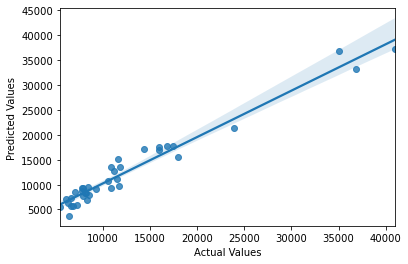

In [75]:
sns.regplot(y1_test,y1_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

### 8.3 Model Evaluation

In [76]:
#Computing the Mean Absolute Error - MAE value
MAE_train_m1 = metrics.mean_absolute_error(y1_train, y1_pred_train)
MAE_test_m1 = metrics.mean_absolute_error(y1_test, y1_pred_test)
print('MAE for training set is {}'.format(MAE_train_m1))
print('MAE for test set is {}'.format(MAE_test_m1))

MAE for training set is 1210.158810954233
MAE for test set is 1392.804793023432


In [77]:
#Computing the Root Mean Square Error - RMSE value
RMSE_train_m1 = np.sqrt( metrics.mean_squared_error(y1_train, y1_pred_train))
RMSE_test_m1 = np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_test))
print('RMSE for training set is {}'.format(RMSE_train_m1))
print('RMSE for test set is {}'.format(RMSE_test_m1))

RMSE for training set is 1860.1379338487325
RMSE for test set is 1730.4460338326855


### 8.4 Model Evaluation using R-squared and Adjusted R-squared value

In [78]:
r2_train_m1 = metrics.r2_score(y1_train,y1_pred_train)
r2_test_m1 = metrics.r2_score(y1_test,y1_pred_test)
print("R2 score for training set is {}".format(r2_train_m1))
print("R2 score for test set is {}".format(r2_test_m1))

R2 score for training set is 0.9455549725672269
R2 score for test set is 0.9583171915335489


In [79]:
adj_r2_train_m1 = 1 - (1-r2_train_m1)*(len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1)
adj_r2_test_m1  = 1 - (1-r2_test_m1)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r2_train_m1))
print("Adjusted R2 score for test set is {}".format(adj_r2_test_m1))

Adjusted R2 score for training set is 0.9229144661100341
Adjusted R2 score for test set is 1.2500968507987067


   ### Feature selection for Model2
   __we will consider engine-size instead of horsepower__

In [80]:
feature_cols_m2 = ['wheel-base', 'curb-weight', 'engine-size', 'bore', 'make', 'aspiration', 'body-style', 'fuel-system', 'engine-type', 'price']
df_car[feature_cols_m2].head()

,wheel-base,curb-weight,engine-size,bore,make,aspiration,body-style,fuel-system,engine-type,price
ID,,,,,,,,,,
1,102.40000,2458,122,3.31000,toyota,std,hatchback,mpfi,ohc,11248
2,101.20000,2710,164,3.31000,bmw,std,sedan,mpfi,ohc,20970
3,96.10000,2579,132,3.46000,renault,std,wagon,mpfi,ohc,9295
4,107.90000,3197,152,3.70000,peugot,turbo,sedan,idi,l,13200
5,104.30000,2935,141,3.78000,volvo,std,sedan,mpfi,ohc,15985


### Encoding of Categorical Variables

In [81]:
# Encoding the categorical variables using One Hot Encoding
car_data2 = pd.get_dummies(df_car[feature_cols_m2], drop_first=True) 
car_data2.head()

,wheel-base,curb-weight,engine-size,bore,price,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,102.40000,2458,122,3.31000,11248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,101.20000,2710,164,3.31000,20970,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,96.10000,2579,132,3.46000,9295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,107.90000,3197,152,3.70000,13200,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5,104.30000,2935,141,3.78000,15985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


### Cross-validation (Train- Test split)

In [82]:
# defining the X and Y variables
X2 = car_data2.drop('price',axis = 1)
y2 = car_data2['price']

In [83]:
X2.head()

,wheel-base,curb-weight,engine-size,bore,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,102.40000,2458,122,3.31000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,101.20000,2710,164,3.31000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,96.10000,2579,132,3.46000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,107.90000,3197,152,3.70000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5,104.30000,2935,141,3.78000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [84]:
y2.head()

ID
1    11248
2    20970
3     9295
4    13200
5    15985
Name: price, dtype: int64

In [85]:
#Splitting our data into training and testing for further development
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20, random_state = 1)

print('Training Data Shape:', X2_train.shape, y2_train.shape)
print('Testing Data Shape:', X2_test.shape, y2_test.shape)

Training Data Shape: (144, 42) (144,)
Testing Data Shape: (37, 42) (37,)


### Standardizing the Explanatory 'X' variables

In [86]:
scaler_m2 = StandardScaler().fit(X2_train)                #.fit calulates the mean and SD of the Train DS
X2_train = scaler_m2.transform(X2_train)                   # .transform applies the mean and deviation over Train DS to standardize
X2_test  = scaler_m2.transform(X2_test)                    # .transform applies the mean and deviation over Test DS to standardize

### Building the model

In [87]:
# we will develop Linear Regression using input features and tune our model if required.
linreg_m2 = LinearRegression()
linreg_m2.fit(X2_train, y2_train) 

LinearRegression()

### Using trained model for prediction

In [88]:
#predicting on train data
y2_pred_train = linreg_m2.predict(X2_train)  

In [89]:
#predicting on test data
y2_pred_test = linreg_m2.predict(X2_test)   

Let's Plot and see how our model is predicting with the test data

Text(0, 0.5, 'Predicted Values')

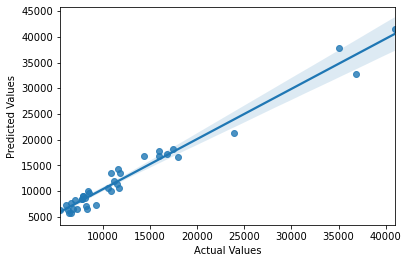

In [90]:
sns.regplot(y2_test,y2_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

### Model Evaluation

In [91]:
#Computing the Mean Absolute Error - MAE value
MAE_train_m2 = metrics.mean_absolute_error(y2_train, y2_pred_train)
MAE_test_m2 = metrics.mean_absolute_error(y2_test, y2_pred_test)
print('MAE for training set is {}'.format(MAE_train_m2))
print('MAE for test set is {}'.format(MAE_test_m2))

MAE for training set is 1132.7868766025347
MAE for test set is 1247.5147961645393


In [92]:
#Computing the Root Mean Square Error - RMSE value
RMSE_train_m2 = np.sqrt( metrics.mean_squared_error(y2_train, y2_pred_train))
RMSE_test_m2 = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_test))
print('RMSE for training set is {}'.format(RMSE_train_m2))
print('RMSE for test set is {}'.format(RMSE_test_m2))

RMSE for training set is 1727.42568783975
RMSE for test set is 1531.7373100312286


__Observation:__
   - The RMSE value of test data of model-2 (1531) has reduced compared to model-1 (1730). So considering engine-size is better than horsepower for predicting the price.

### Model Evaluation using R-squared and Adjusted R-squared value

In [93]:
r2_train_m2 = metrics.r2_score(y2_train,y2_pred_train)
r2_test_m2 = metrics.r2_score(y2_test,y2_pred_test)
print("R2 score for training set is {}".format(r2_train_m2))
print("R2 score for test set is {}".format(r2_test_m2))

R2 score for training set is 0.9530466407379341
R2 score for test set is 0.9673405072517834


In [94]:
adj_r2_train_m2 = 1 - (1-r2_train_m2)*(len(y2_train)-1)/(len(y2_train)-X2_train.shape[1]-1)
adj_r2_test_m2  = 1 - (1-r2_test_m2)*(len(y2_test)-1)/(len(y2_test)-X2_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r2_train_m2))
print("Adjusted R2 score for test set is {}".format(adj_r2_test_m2))

Adjusted R2 score for training set is 0.9335214814408374
Adjusted R2 score for test set is 1.1959569564892993


### Feature selection for Model3
since curb-weight and engine-size are nulticolinear, let's consider this model without curb-weight

In [95]:
feature_cols_m3 = ['wheel-base', 'engine-size', 'bore', 'make', 'aspiration', 'body-style', 'fuel-system', 'engine-type', 'price']
df_car[feature_cols_m3].head()

,wheel-base,engine-size,bore,make,aspiration,body-style,fuel-system,engine-type,price
ID,,,,,,,,,
1,102.40000,122,3.31000,toyota,std,hatchback,mpfi,ohc,11248
2,101.20000,164,3.31000,bmw,std,sedan,mpfi,ohc,20970
3,96.10000,132,3.46000,renault,std,wagon,mpfi,ohc,9295
4,107.90000,152,3.70000,peugot,turbo,sedan,idi,l,13200
5,104.30000,141,3.78000,volvo,std,sedan,mpfi,ohc,15985


### Encoding of Categorical Variables

In [96]:
# Encoding the categorical variables using One Hot Encoding
car_data3 = pd.get_dummies(df_car[feature_cols_m3], drop_first=True) 
car_data3.head()

,wheel-base,engine-size,bore,price,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,102.40000,122,3.31000,11248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,101.20000,164,3.31000,20970,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,96.10000,132,3.46000,9295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,107.90000,152,3.70000,13200,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5,104.30000,141,3.78000,15985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


### 7.3. Cross-validation (Train- Test split)

In [97]:
# defining the X and Y variables
X3 = car_data3.drop('price',axis = 1)
y3 = car_data3['price']

In [98]:
X3.head()

,wheel-base,engine-size,bore,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,102.40000,122,3.31000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,101.20000,164,3.31000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,96.10000,132,3.46000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,107.90000,152,3.70000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5,104.30000,141,3.78000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [99]:
y3.head()

ID
1    11248
2    20970
3     9295
4    13200
5    15985
Name: price, dtype: int64

In [100]:
#Splitting our data into training and testing for further development
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.20, random_state = 1)

print('Training Data Shape:', X3_train.shape, y3_train.shape)
print('Testing Data Shape:', X3_test.shape, y3_test.shape)

Training Data Shape: (144, 41) (144,)
Testing Data Shape: (37, 41) (37,)


### 7.4. Standardizing the Explanatory 'X' variables
- Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a **bias**. 

- To deal with this potential problem **feature-wise standardization** (`μ=0`, `σ=1`) is usually used **prior** to **model fitting**.

In [101]:
scaler_m3 = StandardScaler().fit(X3_train)                #.fit calulates the mean and SD of the Train DS
X3_train = scaler_m3.transform(X3_train)                   # .transform applies the mean and deviation over Train DS to standardize
X3_test  = scaler_m3.transform(X3_test)                    # .transform applies the mean and deviation over Test DS to standardize

### Building the model

In [102]:
# we will develop Linear Regression using input features and tune our model if required.
linreg_m3 = LinearRegression()
linreg_m3.fit(X3_train, y3_train) 

LinearRegression()

### Using trained model for prediction

In [103]:
#predicting on train data
y3_pred_train = linreg_m3.predict(X3_train)  

In [104]:
#predicting on test data
y3_pred_test = linreg_m3.predict(X3_test)   

Let's Plot and see how our model is predicting with the test data

Text(0, 0.5, 'Predicted Values')

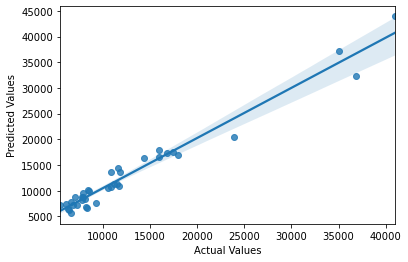

In [105]:
sns.regplot(y3_test,y3_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

### Model Evaluation

In [106]:
#Computing the Mean Absolute Error - MAE value
MAE_train_m3 = metrics.mean_absolute_error(y3_train, y3_pred_train)
MAE_test_m3 = metrics.mean_absolute_error(y3_test, y3_pred_test)
print('MAE for training set is {}'.format(MAE_train_m3))
print('MAE for test set is {}'.format(MAE_test_m3))

MAE for training set is 1195.3181784831768
MAE for test set is 1284.5129450475222


In [107]:
#Computing the Root Mean Square Error - RMSE value
RMSE_train_m3 = np.sqrt( metrics.mean_squared_error(y3_train, y3_pred_train))
RMSE_test_m3 = np.sqrt(metrics.mean_squared_error(y3_test, y3_pred_test))
print('RMSE for training set is {}'.format(RMSE_train_m3))
print('RMSE for test set is {}'.format(RMSE_test_m3))

RMSE for training set is 1794.0667134539863
RMSE for test set is 1651.6338911877021


__Observation__: RMSE value of model-2 (1531) is better compared to model-3 (1651). So we will keep curb-weight for our model.

### 8.4 Model Evaluation using R-squared and Adjusted R-squared value

In [108]:
r2_train_m3 = metrics.r2_score(y3_train,y3_pred_train)
r2_test_m3 = metrics.r2_score(y3_test,y3_pred_test)
print("R2 score for training set is {}".format(r2_train_m3))
print("R2 score for test set is {}".format(r2_test_m3))

R2 score for training set is 0.9493540060078047
R2 score for test set is 0.9620275669553479


In [109]:
adj_r2_train_m3 = 1 - (1-r2_train_m3)*(len(y3_train)-1)/(len(y3_train)-X3_train.shape[1]-1)
adj_r2_test_m3  = 1 - (1-r2_test_m3)*(len(y3_test)-1)/(len(y3_test)-X3_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r2_train_m3))
print("Adjusted R2 score for test set is {}".format(adj_r2_test_m3))

Adjusted R2 score for training set is 0.9289963025403537
Adjusted R2 score for test set is 1.2734015179214955


### Feature selection for Model4
Let's consider length and weight features instead of wheel-base for this model.

In [110]:
feature_cols_m4 = ['length','width','curb-weight','engine-size','bore', 'make', 'aspiration','body-style','engine-type', 'fuel-system','price']
df_car[feature_cols_m4].head()

,length,width,curb-weight,engine-size,bore,make,aspiration,body-style,engine-type,fuel-system,price
ID,,,,,,,,,,,
1,175.60000,66.50000,2458,122,3.31000,toyota,std,hatchback,ohc,mpfi,11248
2,176.80000,64.80000,2710,164,3.31000,bmw,std,sedan,ohc,mpfi,20970
3,181.50000,66.50000,2579,132,3.46000,renault,std,wagon,ohc,mpfi,9295
4,186.70000,68.40000,3197,152,3.70000,peugot,turbo,sedan,l,idi,13200
5,188.80000,67.20000,2935,141,3.78000,volvo,std,sedan,ohc,mpfi,15985


### Encoding of Categorical Variables

In [111]:
# Encoding the categorical variables using One Hot Encoding
car_data4 = pd.get_dummies(df_car[feature_cols_m4], drop_first=True) 
car_data4.head()

,length,width,curb-weight,engine-size,bore,price,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,175.60000,66.50000,2458,122,3.31000,11248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,176.80000,64.80000,2710,164,3.31000,20970,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,181.50000,66.50000,2579,132,3.46000,9295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,186.70000,68.40000,3197,152,3.70000,13200,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
5,188.80000,67.20000,2935,141,3.78000,15985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


### 7.3. Cross-validation (Train- Test split)

In [112]:
# defining the X and Y variables
X4 = car_data4.drop('price',axis = 1)
y4 = np.log(car_data4['price'])

In [113]:
X4.head()

,length,width,curb-weight,engine-size,bore,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,175.60000,66.50000,2458,122,3.31000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,176.80000,64.80000,2710,164,3.31000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,181.50000,66.50000,2579,132,3.46000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,186.70000,68.40000,3197,152,3.70000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
5,188.80000,67.20000,2935,141,3.78000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


In [114]:
X4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 181
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   length                181 non-null    float64
 1   width                 181 non-null    float64
 2   curb-weight           181 non-null    int64  
 3   engine-size           181 non-null    int64  
 4   bore                  181 non-null    float64
 5   make_audi             181 non-null    uint8  
 6   make_bmw              181 non-null    uint8  
 7   make_chevrolet        181 non-null    uint8  
 8   make_dodge            181 non-null    uint8  
 9   make_honda            181 non-null    uint8  
 10  make_isuzu            181 non-null    uint8  
 11  make_jaguar           181 non-null    uint8  
 12  make_mazda            181 non-null    uint8  
 13  make_mercedes-benz    181 non-null    uint8  
 14  make_mercury          181 non-null    uint8  
 15  make_mitsubishi       1

In [115]:
y4.head()

ID
1   9.32795
2   9.95085
3   9.13723
4   9.48797
5   9.67941
Name: price, dtype: float64

In [116]:
#Splitting our data into training and testing for further development
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.20, random_state = 1)

print('Training Data Shape:', X4_train.shape, y4_train.shape)
print('Testing Data Shape:', X4_test.shape, y4_test.shape)

Training Data Shape: (144, 43) (144,)
Testing Data Shape: (37, 43) (37,)


### 7.4. Standardizing the Explanatory 'X' variables
- Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a **bias**. 

- To deal with this potential problem **feature-wise standardization** (`μ=0`, `σ=1`) is usually used **prior** to **model fitting**.

In [117]:
scaler_m4 = StandardScaler().fit(X4_train)                #.fit calulates the mean and SD of the Train DS
X4_train = scaler_m4.transform(X4_train)                   # .transform applies the mean and deviation over Train DS to standardize
X4_test  = scaler_m4.transform(X4_test)                    # .transform applies the mean and deviation over Test DS to standardize

### Building the model

In [118]:
# we will develop Linear Regression using input features and tune our model if required.
linreg_m4 = LinearRegression()
linreg_m4.fit(X4_train, y4_train) 

LinearRegression()

### Using trained model for prediction

In [119]:
#predicting on train data
y4_pred_train = linreg_m4.predict(X4_train)  

In [120]:
#predicting on test data
y4_pred_test = linreg_m4.predict(X4_test)   

Let's Plot and see how our model is predicting with the test data

Text(0, 0.5, 'Predicted Values')

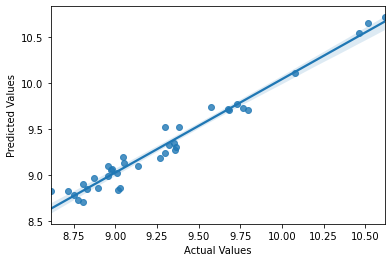

In [121]:
sns.regplot(y4_test,y4_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

### Model Evaluation

In [122]:
#Computing the Mean Absolute Error - MAE value
MAE_train_m4 = metrics.mean_absolute_error(y4_train, y4_pred_train)
MAE_test_m4 = metrics.mean_absolute_error(y4_test, y4_pred_test)
print('MAE for training set is {}'.format(MAE_train_m4))
print('MAE for test set is {}'.format(MAE_test_m4))

MAE for training set is 0.07389223158842478
MAE for test set is 0.08336109927929347


In [123]:
#Computing the Root Mean Square Error - RMSE value
RMSE_train_m4 = np.sqrt( metrics.mean_squared_error(y4_train, y4_pred_train))
RMSE_test_m4 = np.sqrt(metrics.mean_squared_error(y4_test, y4_pred_test))
print('RMSE for training set is {}'.format(RMSE_train_m4))
print('RMSE for test set is {}'.format(RMSE_test_m4))

RMSE for training set is 0.0990811896385818
RMSE for test set is 0.10116605806548548


__observation:__ RMSE value of the test data for model 4 (1448) has reduced compared to model 2 (1531). So we will consider length and width parameter for our model.

### 8.4 Model Evaluation using R-squared and Adjusted R-squared value

In [124]:
r2_train_m4 = metrics.r2_score(y4_train,y4_pred_train)
r2_test_m4 = metrics.r2_score(y4_test,y4_pred_test)
print("R2 score for training set is {}".format(r2_train_m4))
print("R2 score for test set is {}".format(r2_test_m4))

R2 score for training set is 0.9610728418555915
R2 score for test set is 0.9600663302173282


In [125]:
adj_r2_train_m4 = 1 - (1-r2_train_m4)*(len(y4_train)-1)/(len(y4_train)-X4_train.shape[1]-1)
adj_r2_test_m4  = 1 - (1-r2_test_m4)*(len(y4_test)-1)/(len(y4_test)-X4_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r2_train_m4))
print("Adjusted R2 score for test set is {}".format(adj_r2_test_m4))

Adjusted R2 score for training set is 0.9443341638534959
Adjusted R2 score for test set is 1.205373158882312


__Observation:__ RMSE is least and R2 score of model 4 is better than other models. We will go ahead with this model for our price prediction.

   #### encountered column mismatch issue while doing scaling of the test data so we go with one-hot-encoding of categorical variables using sklearn

### Encoding of Categorical Variables

In [133]:
# Encoding the categorical variables using One Hot Encoding
catg_col = ['make', 'aspiration', 'body-style', 'fuel-system', 'engine-type']

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', dtype=int)

enc_values = encoder.fit_transform(df_car[catg_col]).toarray()
enc_values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [140]:
enc_df = pd.DataFrame()
enc_df = pd.DataFrame(enc_values)
enc_df.index = np.arange(1, len(enc_df)+1)
enc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [129]:
encoder.categories_

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object),
 array(['std', 'turbo'], dtype=object),
 array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
       dtype=object),
 array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
       dtype=object),
 array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]

In [141]:
enc_columns = encoder.get_feature_names(['make', 'aspiration', 'body-style', 'fuel-system', 'engine-type'])
enc_columns

array(['make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar',
       'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'aspiration_std',
       'aspiration_turbo', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi', 'engine-type_dohc',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor'], dtype=object)

In [142]:
enc_df.columns = enc_columns
enc_df.head()

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [143]:
numeric_col = ['length', 'width','curb-weight','engine-size','bore','price']
car_data5 = pd.concat([df_car[numeric_col],enc_df], axis=1)
car_data5

,length,width,curb-weight,engine-size,bore,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
1,175.60000,66.50000,2458,122,3.31000,11248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,176.80000,64.80000,2710,164,3.31000,20970,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,181.50000,66.50000,2579,132,3.46000,9295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,186.70000,68.40000,3197,152,3.70000,13200,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5,188.80000,67.20000,2935,141,3.78000,15985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6,157.30000,63.80000,2128,98,3.03000,7957,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7,199.60000,69.60000,4066,258,3.63000,32250,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8,168.90000,65.00000,2756,194,3.74000,32528,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9,173.50000,65.40000,2455,108,3.62000,10198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
10,173.00000,65.40000,2370,110,3.17000,9959,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


### 7.3. Cross-validation (Train- Test split)

In [145]:
# defining the X and Y variables
X5 = car_data5.drop('price',axis = 1)
y5 = np.log(car_data5['price'])

In [146]:
X5.head()

,length,width,curb-weight,engine-size,bore,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
1,175.60000,66.50000,2458,122,3.31000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,176.80000,64.80000,2710,164,3.31000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,181.50000,66.50000,2579,132,3.46000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,186.70000,68.40000,3197,152,3.70000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5,188.80000,67.20000,2935,141,3.78000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [147]:
y5.head()

1   9.32795
2   9.95085
3   9.13723
4   9.48797
5   9.67941
Name: price, dtype: float64

In [148]:
#Splitting our data into training and testing for further development
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.20, random_state = 1)

print('Training Data Shape:', X5_train.shape, y5_train.shape)
print('Testing Data Shape:', X5_test.shape, y5_test.shape)

Training Data Shape: (144, 48) (144,)
Testing Data Shape: (37, 48) (37,)


### 7.4. Standardizing the Explanatory 'X' variables
- Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a **bias**. 

- To deal with this potential problem **feature-wise standardization** (`μ=0`, `σ=1`) is usually used **prior** to **model fitting**.

In [149]:
scaler_m5 = StandardScaler().fit(X5_train)                #.fit calulates the mean and SD of the Train DS
X5_train = scaler_m5.transform(X5_train)                   # .transform applies the mean and deviation over Train DS to standardize
X5_test  = scaler_m5.transform(X5_test)                    # .transform applies the mean and deviation over Test DS to standardize

### Building the model

In [150]:
# we will develop Linear Regression using input features and tune our model if required.
linreg_m5 = LinearRegression()
linreg_m5.fit(X5_train, y5_train) 

LinearRegression()

### Using trained model for prediction

In [151]:
#predicting on train data
y5_pred_train = linreg_m5.predict(X5_train)  

In [152]:
#predicting on test data
y5_pred_test = linreg_m5.predict(X5_test)   

Let's Plot and see how our model is predicting with the test data

Text(0, 0.5, 'Predicted Values')

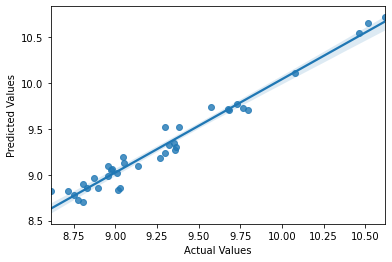

In [153]:
sns.regplot(y5_test,y5_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

### Model Evaluation

In [154]:
#Computing the Mean Absolute Error - MAE value
MAE_train_m5 = metrics.mean_absolute_error(y5_train, y5_pred_train)
MAE_test_m5 = metrics.mean_absolute_error(y5_test, y5_pred_test)
print('MAE for training set is {}'.format(MAE_train_m5))
print('MAE for test set is {}'.format(MAE_test_m5))

MAE for training set is 0.07389223158842478
MAE for test set is 0.08336109927929347


In [155]:
#Computing the Root Mean Square Error - RMSE value
RMSE_train_m5 = np.sqrt( metrics.mean_squared_error(y5_train, y5_pred_train))
RMSE_test_m5 = np.sqrt(metrics.mean_squared_error(y5_test, y5_pred_test))
print('RMSE for training set is {}'.format(RMSE_train_m5))
print('RMSE for test set is {}'.format(RMSE_test_m5))

RMSE for training set is 0.09908118963858183
RMSE for test set is 0.10116605806548558


### 8.4 Model Evaluation using R-squared and Adjusted R-squared value

In [156]:
r2_train_m5 = metrics.r2_score(y5_train,y5_pred_train)
r2_test_m5 = metrics.r2_score(y5_test,y5_pred_test)
print("R2 score for training set is {}".format(r2_train_m5))
print("R2 score for test set is {}".format(r2_test_m5))

R2 score for training set is 0.9610728418555915
R2 score for test set is 0.9600663302173281


In [157]:
adj_r2_train_m5 = 1 - (1-r2_train_m5)*(len(y5_train)-1)/(len(y5_train)-X5_train.shape[1]-1)
adj_r2_test_m5  = 1 - (1-r2_test_m5)*(len(y5_test)-1)/(len(y5_test)-X5_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r2_train_m5))
print("Adjusted R2 score for test set is {}".format(adj_r2_test_m5))

Adjusted R2 score for training set is 0.9414043830036798
Adjusted R2 score for test set is 1.1198010093480155


# 9. Predicting the Price for the test data

In [158]:
test_data = pd.read_csv('TestData.csv', index_col=0)
print('Data Shape:', test_data.shape)
test_data.head()

Data Shape: (20, 25)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2912,ohc,four,141,mpfi,3.78000,3.15000,9.50000,114,5400,23,28
2,0,188,bmw,gas,std,four,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2765,ohc,six,164,mpfi,3.31000,3.19000,9.00000,121,4250,21,28
3,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.30000,188.80000,67.20000,57.50000,3157,ohc,four,130,mpfi,3.62000,3.15000,7.50000,162,5100,17,22
4,1,154,plymouth,gas,std,four,sedan,fwd,front,93.70000,167.30000,63.80000,50.80000,1989,ohc,four,90,2bbl,2.97000,3.23000,9.40000,68,5500,31,38
5,1,103,nissan,gas,std,four,wagon,fwd,front,94.50000,170.20000,63.80000,53.50000,2037,ohc,four,97,2bbl,3.15000,3.29000,9.40000,69,5200,31,37


In [159]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          20 non-null     int64  
 1   normalized-losses  20 non-null     object 
 2   make               20 non-null     object 
 3   fuel-type          20 non-null     object 
 4   aspiration         20 non-null     object 
 5   num-of-doors       20 non-null     object 
 6   body-style         20 non-null     object 
 7   drive-wheels       20 non-null     object 
 8   engine-location    20 non-null     object 
 9   wheel-base         20 non-null     float64
 10  length             20 non-null     float64
 11  width              20 non-null     float64
 12  height             20 non-null     float64
 13  curb-weight        20 non-null     int64  
 14  engine-type        20 non-null     object 
 15  num-of-cylinders   20 non-null     object 
 16  engine-size        20 non-nu

In [160]:
test_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,20.00000,20,20,20,20,20,20,20,20,20.00000,20.00000,20.00000,20.00000,20.00000,20,20,20.00000,20,20.00000,20.00000,20.00000,20.00000,20.00000,20.00000,20.00000
unique,nan,15,12,2,2,2,3,2,1,nan,nan,nan,nan,nan,3,3,nan,4,nan,nan,nan,nan,nan,nan,nan
top,nan,?,toyota,gas,std,four,sedan,fwd,front,nan,nan,nan,nan,nan,ohc,four,nan,mpfi,nan,nan,nan,nan,nan,nan,nan
freq,nan,3,4,18,18,11,11,10,20,nan,nan,nan,nan,nan,17,17,nan,11,nan,nan,nan,nan,nan,nan,nan
mean,0.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.41000,174.44500,65.39500,54.28000,2478.75000,NaN,NaN,117.60000,NaN,3.25750,3.10150,10.25500,96.50000,5215.00000,25.60000,31.05000
std,1.16416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.70502,12.50581,1.60213,1.91328,462.28538,NaN,NaN,29.90406,NaN,0.31370,0.36582,4.31149,33.70850,544.85633,6.62054,6.26162
min,-2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.70000,150.00000,63.60000,50.80000,1918.00000,NaN,NaN,90.00000,NaN,2.54000,2.07000,7.50000,56.00000,4250.00000,16.00000,22.00000
25%,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.50000,167.05000,64.00000,52.90000,2025.00000,NaN,NaN,97.00000,NaN,3.04000,3.06750,8.47500,68.75000,4950.00000,19.00000,26.50000
50%,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.20000,173.35000,64.80000,54.35000,2357.00000,NaN,NaN,109.00000,NaN,3.21500,3.19000,9.10000,96.00000,5200.00000,24.50000,29.00000
75%,1.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.70000,186.62500,66.60000,55.80000,2801.75000,NaN,NaN,131.50000,NaN,3.47000,3.30500,9.40000,112.50000,5500.00000,31.00000,37.00000


In [161]:
#Feature Selection of the test data
feature_cols_test = ['length','width', 'curb-weight', 'engine-size', 'bore', 'make', 'aspiration', 'body-style', 'fuel-system', 'engine-type']
test_data[feature_cols_test].head()

,length,width,curb-weight,engine-size,bore,make,aspiration,body-style,fuel-system,engine-type
ID,,,,,,,,,,
1,188.80000,67.20000,2912,141,3.78000,volvo,std,sedan,mpfi,ohc
2,176.80000,64.80000,2765,164,3.31000,bmw,std,sedan,mpfi,ohc
3,188.80000,67.20000,3157,130,3.62000,volvo,turbo,wagon,mpfi,ohc
4,167.30000,63.80000,1989,90,2.97000,plymouth,std,sedan,2bbl,ohc
5,170.20000,63.80000,2037,97,3.15000,nissan,std,wagon,2bbl,ohc


In [167]:
#Encoding the Categorical Variables of the selected test data
enc_test_data = pd.DataFrame()
enc_test_data = pd.DataFrame(encoder.transform(test_data[catg_col]).toarray())
enc_test_data.index=np.arange(1, len(enc_test_data)+1)
enc_test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [169]:
enc_test_data.columns = enc_columns
enc_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   make_alfa-romero        20 non-null     int32
 1   make_audi               20 non-null     int32
 2   make_bmw                20 non-null     int32
 3   make_chevrolet          20 non-null     int32
 4   make_dodge              20 non-null     int32
 5   make_honda              20 non-null     int32
 6   make_isuzu              20 non-null     int32
 7   make_jaguar             20 non-null     int32
 8   make_mazda              20 non-null     int32
 9   make_mercedes-benz      20 non-null     int32
 10  make_mercury            20 non-null     int32
 11  make_mitsubishi         20 non-null     int32
 12  make_nissan             20 non-null     int32
 13  make_peugot             20 non-null     int32
 14  make_plymouth           20 non-null     int32
 15  make_porsche            2

In [170]:
car_test_data = pd.concat([test_data[['length','width', 'curb-weight', 'engine-size', 'bore']],enc_test_data], axis=1)
car_test_data

,length,width,curb-weight,engine-size,bore,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
1,188.80000,67.20000,2912,141,3.78000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,176.80000,64.80000,2765,164,3.31000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,188.80000,67.20000,3157,130,3.62000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,167.30000,63.80000,1989,90,2.97000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,170.20000,63.80000,2037,97,3.15000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
6,171.70000,65.50000,2319,97,3.01000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,175.00000,66.10000,2670,140,3.76000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,186.70000,68.40000,3020,120,3.46000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9,150.00000,64.00000,1956,92,2.91000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
10,157.30000,64.40000,1944,92,2.97000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [171]:
# Standardizing the input Explanatory Variables with the scaler of model5 above
car_test_data = scaler_m5.transform(car_test_data)

In [172]:
# Predicting the target variable 'Price'
y_pred_test_data = linreg_m5.predict(car_test_data)   
y_pred_test_data

array([ 9.70434872, 10.02151908,  9.81718036,  8.77360135,  8.80482878,
        9.22363102,  9.44947392,  9.51210386,  8.8468932 ,  8.66894747,
        9.59201919,  8.84018647,  8.88672563,  8.75716593,  9.57375828,
       10.39740156,  9.07327624,  9.55512184,  9.69332101,  9.00209106])

In [173]:
# converting the log 'price' value
y_pred  =  np.exp(y_pred_test_data).astype(int)
y_pred

array([16388, 22505, 18346,  6461,  6666, 10133, 12701, 13522,  6952,
        5819, 14647,  6906,  7235,  6356, 14382, 32774,  8719, 14116,
       16208,  8120])

In [176]:
output_df = pd.DataFrame()
output_df = pd.DataFrame(y_pred, index=np.arange(1, len(y_pred)+1))
output_df

,0
1,16388
2,22505
3,18346
4,6461
5,6666
6,10133
7,12701
8,13522
9,6952
10,5819


In [179]:
output_df.to_csv('submission.csv',header=False)